Import

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Init

In [11]:
image_dir = "img"
image_name = "bacteria_dark.jpg"
image_name = f"{image_dir}/{image_name}"

Load image

[[ 28  29  32  26  32  32  28  29  31  31  29  34  25  37  34  32  28  36
   37  35  29  33  30  28  34  33  34  36  31  35  33  28  29  36  34  29
   36  32  33  33  33  36  38  33  35  37  30  30  33  33  38  36  28  30
   36  34  35  24  32  35  35  35  28  34  37  33  30  30  33  35  33  28
   35  29  35  36  31  31  33  35  37  32  32  37  36  32  32  33  35  37
   33  43  36  29  32  33  34  31  33  37  36  36  36  31  39  32  29  33
   36  31  30  34  39  33  37  37  39  41  34  34  38  34  32  34  35  39
   43  45  39  41  42  41  40  44  36  36  38  38  37  40  36  40  39  39
   39  36  32  33  36  38  36  34  37  35  47  48  38  35  43  39  34  36
   36  33  43  38  49  46  37  38  31  34  35  33  41  40  36  42  46  40
   37  39  38  43  41  42  45  45  42  35  42  42  48  42  42  37  34  39
   44  49  46  45  38  37  38  39  42  35  41  43  42  46  51  41  46  44
   38  48  40  35  38  39  44  49  46  44  38  40  42  40  42  38  39  42
   46  40  43  38  39  45  40  38  45 

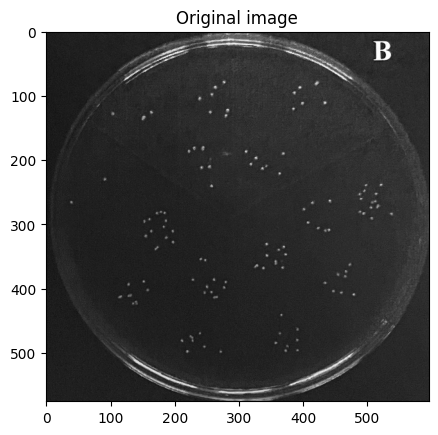

In [32]:
image = cv2.imread(image_name, 0)
rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

with np.printoptions(threshold=np.inf):
  print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

Circular crop

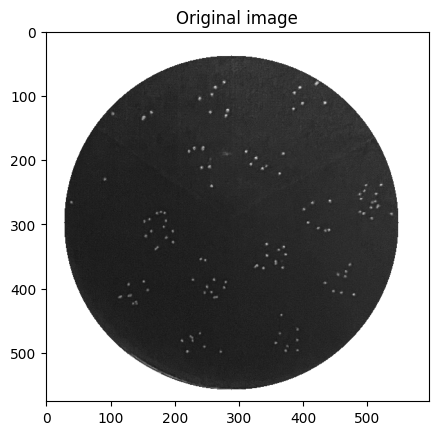

In [6]:
image = rgb_image

# get image dimensions
height, width = image.shape[:2]
h = height // 2
w = width // 2

# define radius
r1 = 260

# draw filled circles in white on black background as masks
mask = np.zeros_like(image)
mask = cv2.circle(mask, (h, w), r1, (255,255,255), -1)

# put mask into alpha channel input
res = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
res[:, :, 3] = mask[:, :, 0]

image = res

plt.imshow(res, cmap="gray")
plt.title("Original image")
plt.show()

Histogram equalisation

[[ 19  27  56   9  56  56  19  27  46  46  27  77   6 107  77  56  19  98
  107  88  27  67  36  19  77  67  77  98  46  88  67  19  27  98  77  27
   98  56  67  67  67  98 117  67  88 107  36  36  67  67 117  98  19  36
   98  77  88   4  56  88  88  88  19  77 107  67  36  36  67  88  67  19
   88  27  88  98  46  46  67  88 107  56  56 107  98  56  56  67  88 107
   67 160  98  27  56  67  77  46  67 107  98  98  98  46 125  56  27  67
   98  46  36  77 125  67 107 107 125 143  77  77 117  77  56  77  88 125
  160 177 125 143 151 143 134 169  98  98 117 117 107 134  98 134 125 125
  125  98  56  67  98 117  98  77 107  88 193 199 117  88 160 125  77  98
   98  67 160 117 205 185 107 117  46  77  88  67 143 134  98 151 185 134
  107 125 117 160 143 151 177 177 151  88 151 151 199 151 151 107  77 125
  169 205 185 177 117 107 117 125 151  88 143 160 151 185 215 143 185 169
  117 199 134  88 117 125 169 205 185 169 117 134 151 134 151 117 125 151
  185 134 160 117 125 177 134 117 177 

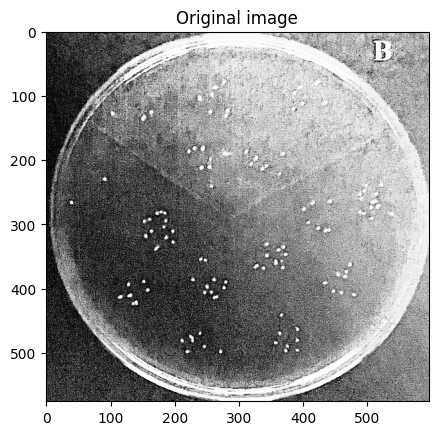

In [13]:
image = cv2.equalizeHist(image)

with np.printoptions(threshold=np.inf):
  print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

6


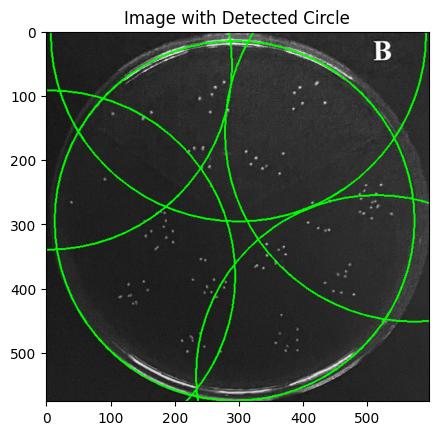

In [33]:
# Get the height and width of the image
height, width = image.shape[:2]

# Calculate the center of the image
h = height // 2
w = width // 2


# Detect the main circle using Hough Circle Transform
main_circle = cv2.HoughCircles(
    image,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=h,
    param1=100,
    param2=1.5,
    minRadius=h-10,
    maxRadius=h+10
)

count = 0

if main_circle is not None:
    circles = np.round(main_circle[0, :]).astype("int")

    for (x, y, r) in circles:
        # Draw the detected circle
        cv2.circle(rgb_image, (x, y), r, (0, 255, 0), 2)
        count += 1

print(count)

# Display the image with the detected circle
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Detected Circle")
plt.show()


Binary thresholding

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

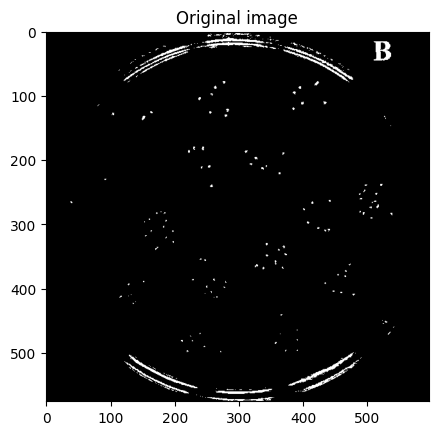

In [5]:
ret, image = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)

with np.printoptions(threshold=np.inf):
  print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

Define erosion / dilation kernel

In [6]:
kernel = np.ones((3,3), np.uint8)

print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Apply erosion

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

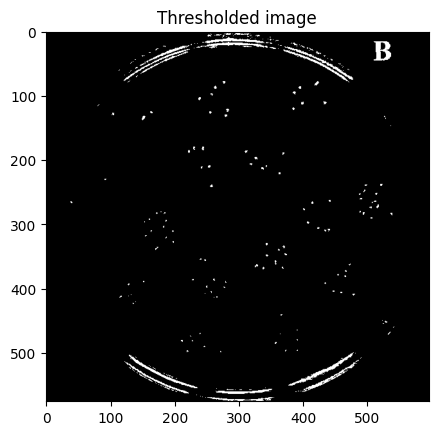

In [14]:
thresh = cv2.erode(image, kernel, iterations=0)

with np.printoptions(threshold=np.inf):
  print(thresh)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")
plt.show()

Apply dilation

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

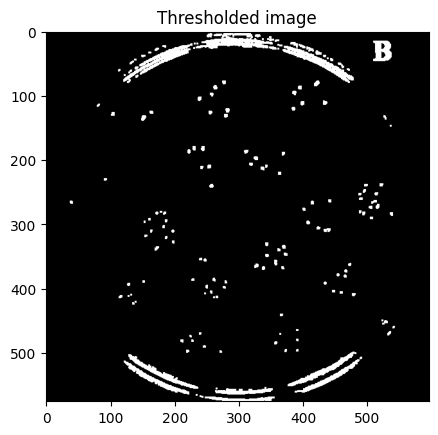

In [15]:
thresh = cv2.dilate(image, kernel, iterations=1)

with np.printoptions(threshold=np.inf):
  print(thresh)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")
plt.show()

Find the circles

In [18]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=0.9, minRadius=1, maxRadius=3)

print(circles)

[[[465.00003   381.          2.3200002]
  [433.80002   391.80002     2.2      ]
  [ 39.        265.80002     2.3200002]
  [172.20001   282.6         2.3200002]
  [367.80002   367.80002     2.3200002]
  [241.8       211.8         2.3200002]
  [361.80002   340.2         2.3200002]
  [443.40002    43.800003    2.3200002]
  [127.8       394.2         2.2      ]
  [246.6       355.80002     2.2      ]
  [115.8       412.2         2.3200002]
  [150.6        37.800003    2.3200002]
  [210.6       481.80002     2.3200002]
  [229.8       183.          2.3200002]
  [342.6       330.6         2.3200002]
  [537.        283.80002     2.3200002]
  [ 91.8       229.8         2.2      ]
  [186.6       321.          2.2      ]
  [279.        389.40002     2.2      ]
  [469.80002    59.4         2.2      ]
  [459.00003   406.2         2.08     ]
  [384.6       120.600006    2.3200002]
  [495.00003   247.8         2.3200002]
  [504.6       274.2         2.3200002]
  [528.60004   451.80002     2.3200002]


Count and draw circles

115


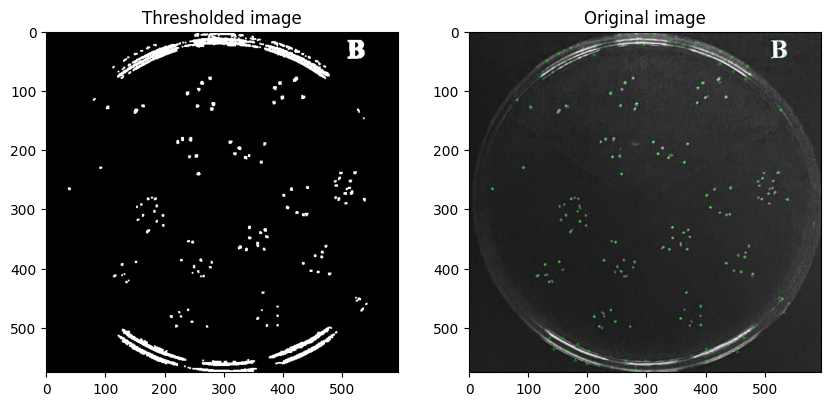

In [10]:
count = 0

if circles is not None:
  circles = np.round(circles[0, :]).astype("int")

  for (x,y,r) in circles:
    if r <= 8 / 3.14:
      cv2.circle(rgb_image, (x,y), r, (0,255,0), 1)
      count += 1

print(count)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")

plt.subplot(1,2,2)
plt.imshow(rgb_image)
plt.title("Original image")

plt.show()